In [1]:
#import all helpers
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import math
import statsmodels.api as sm
from patsy import dmatrices
from sklearn import preprocessing
from sklearn.cross_validation import train_test_split, cross_val_score
from sklearn.preprocessing import FunctionTransformer, PolynomialFeatures
from sklearn.decomposition import FactorAnalysis, PCA
from sklearn.feature_selection import GenericUnivariateSelect, RFE
from sklearn import metrics
from sklearn import linear_model, decomposition, datasets
from sklearn.preprocessing import Normalizer, StandardScaler
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.model_selection import GridSearchCV
import seaborn as sns # More snazzy plotting library
import itertools
from itertools import  product

#import regressors
#-----Ensemble---------------------
from sklearn.ensemble import       AdaBoostRegressor
from sklearn.ensemble import       BaggingRegressor
from sklearn.ensemble import       ExtraTreesRegressor
from sklearn.ensemble import       GradientBoostingRegressor
from sklearn.ensemble import       RandomForestRegressor

#----Generalized Linear models-----
from sklearn.linear_model import   ARDRegression
from sklearn.linear_model import   BayesianRidge
from sklearn.linear_model import   ElasticNet
from sklearn.linear_model import   HuberRegressor
from sklearn.linear_model import   Lars
from sklearn.linear_model import   Lasso
from sklearn.linear_model import   LassoLars
from sklearn.linear_model import   LinearRegression
from sklearn.linear_model import   PassiveAggressiveRegressor
from sklearn.linear_model import   Ridge
from sklearn.linear_model import   SGDRegressor
from sklearn.linear_model import   OrthogonalMatchingPursuit
from sklearn.linear_model import   RANSACRegressor
from sklearn.linear_model import   TheilSenRegressor

#---Nearest Neighbors----
from sklearn.neighbors import      KNeighborsRegressor
from sklearn.neighbors import      RadiusNeighborsRegressor


#----Neural Networks--------------- 
from sklearn.neural_network import MLPRegressor

#-----Support Vector Machines------
from sklearn.svm import            SVR
from sklearn.svm import            LinearSVR
from sklearn.svm import            NuSVR

#-----Decission Trees--------------
from sklearn.tree import           DecisionTreeRegressor
from sklearn.tree import           ExtraTreeRegressor

#----extras
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.isotonic import         IsotonicRegression
from sklearn.kernel_ridge import     KernelRidge



#file_path =  "../dataset/movie_metadata_cleaned_tfidf_num_only_min.csv"
file_path =  "../dataset/movie_metadata_cleaned_categ_num_only.csv"
#file_path = "../dataset/movie_metadata_cleaned_no_vector_num_only.csv"

dta = pd.read_csv(file_path)
dta_clean = dta
#remove the null values, that is fill NaN with there - FIXME: Rihards, naive implementation
dta_clean = dta_clean.fillna(value=0, axis=1)
dta_clean = dta_clean.dropna()
dta_clean = dta_clean.drop('Unnamed: 0', axis=1)
dta_clean.describe()


/usr/local/lib/python3.4/dist-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


,actor_1_facebook_likes,actor_2_facebook_likes,actor_3_facebook_likes,blockbuster_month,cast_total_facebook_likes,director_facebook_likes,dump_month,duration,imdb_score,movie_facebook_likes,...,raiting_pg,raiting_pg13,raiting_r,raiting_tv14,raiting_tvg,raiting_tvma,raiting_tvpg,raiting_tvy7,raiting_unrated,raiting_x
count,4812.000000,4812.000000,4812.000000,4812.000000,4812.000000,4812.000000,4812.000000,4812.000000,4812.000000,4812.000000,...,4812.000000,4812.000000,4812.000000,4812.000000,4812.000000,4812.000000,4812.000000,4812.000000,4812.000000,4812.000000
mean,6801.628221,1720.181629,662.147548,0.368869,10068.043225,742.647756,0.219659,106.889443,6.417249,8067.969659,...,0.141521,0.297589,0.427265,0.003741,0.001455,0.002702,0.001870,0.000208,0.011222,0.000416
std,15654.706536,4105.115266,1665.732147,0.482549,18756.607185,2934.558160,0.414059,21.994601,1.105504,20009.801260,...,0.348595,0.457245,0.494733,0.061053,0.038117,0.051912,0.043211,0.014416,0.105349,0.020385
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.000000,1.600000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,644.750000,310.000000,154.000000,0.000000,1563.250000,8.000000,0.000000,93.000000,5.800000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1000.000000,628.000000,389.000000,0.000000,3258.000000,53.000000,0.000000,103.000000,6.500000,192.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,12000.000000,942.000000,650.000000,1.000000,14618.750000,212.000000,0.000000,118.000000,7.200000,7000.000000,...,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,713000.000000,137000.000000,23000.000000,1.000000,729779.000000,33000.000000,1.000000,227.000000,9.600000,353000.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [35]:
#clasify the data for the logistic regression
def label_gross (gross):
    if (gross < 1000000) : return 1
    elif ((gross >= 1000000) & (gross < 10000000)) : return 2
    elif ((gross >= 10000000) & (gross < 50000000)) : return 3
    elif ((gross >= 50000000) & (gross < 200000000)) : return 4
    elif (gross >= 200000000) : return 5
    
#y = dta_clean.worldwide_gross.apply (lambda gross: label_gross (gross))
y = dta_clean['worldwide_gross']
X = dta_clean.drop('worldwide_gross', axis=1)

X_col = X.columns
if False:
    nomalizer_scaler = preprocessing.Normalizer().fit(X)
    X = nomalizer_scaler.transform(X)
if False:
    standard_scaler = preprocessing.StandardScaler().fit(X)
    X = standard_scaler.transform(X)
        
#pd.DataFrame(X, columns=X_col).describe()
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
#model = SVR(kernel='rbf', verbose=2)

#model = LinearRegression()
#model = LogisticRegression()

#model = DecisionTreeRegressor()
#model = DecisionTreeClassifier()

#model = BayesianRidge()
#model = RidgeClassifier()

#model = KNeighborsRegressor()
#model = KNeighborsClassifier()

model = GradientBoostingRegressor()
#from sklearn.linear_model import   ARDRegression
#model = GradientBoostingClassifier()

#model = AdaBoostRegressor()
#model = AdaBoostClassifier()

#model = LinearSVR()
#model = LinearSVC()

#model = SVR(kernel='rbf')
#model = SVC(kernel='rbf')

#model = MLPRegressor(solver='lbfgs',  max_iter=1000)
#model = MLPClassifier(solver='lbfgs',  max_iter=1000)
#model = ExtraTreesRegressor()
#model.fit(X_train, y_train)
# check the accuracy on the training set
#model.predict(X_test)
#LR_1.score(X_1, y_1)
#model.score(X_test, y_test)
#score_re = {}
#scorers = ['accuracy', 'adjusted_rand_score', 'average_precision', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 'neg_log_loss', 'neg_mean_absolute_error', 'neg_mean_squared_error', 'neg_median_absolute_error', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'r2', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'roc_auc']
#for scoring in scorers:
#    try:
#        print(scoring)
#        score_re[scoring] = cross_val_score(model, X, y, scoring=scoring)
#    except (ValueError, AttributeError): 
#        continue
#model = GradientBoostingRegressor()
#X.describe()
#X, _X_dummy, y, _y_dummy = train_test_split(X, y, test_size=0)
#model.coef_ 

In [36]:
from sklearn.preprocessing import FunctionTransformer,PolynomialFeatures
def dummy(X):   return X
DummyTransformer = FunctionTransformer(dummy)
LogarithmicFeatures = FunctionTransformer(np.log1p)
#X = DummyTransformer.fit_transform(X,y)
#X = preprocessing.Normalizer().fit_transform(X)
first  = DummyTransformer
second = PolynomialFeatures()
#first  = DummyTransformer
#second = DummyTransformer
model = GradientBoostingRegressor()
pipe = Pipeline(steps=[('first', first), ('second', second), ('model', model)])
#pd.DataFrame(pipe.fit_transform(X,y)).describe()
est = GridSearchCV(pipe, dict(second__degree = [2]), verbose=2, cv=5, n_jobs=4)
est.fit(X,y)


Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] second__degree=2 ................................................
[CV] second__degree=2 ................................................
[CV] second__degree=2 ................................................
[CV] second__degree=2 ................................................


KeyboardInterrupt: 

In [ ]:
#est.best_score_
transform = dict(transform__das = [40,2],
                 transform__fa = ["aa", "asb"]
                )
model = dict(model__degree = [1,2],
             model__sumthin = ["a", "b"]
            )
print (n_samples)
print (n_features)

def poly(X, pw):
    res = X
    for power in range(2,pw + 1):
        res = np.concatenate((res, np.power(X, power)), axis=1)
    return res

def log(X):
    df_t = pd.DataFrame(X)
    X_t = df_t.replace(0, 1/math.e) 
    return np.concatenate((X, np.log(X_t)), axis=1)

PolyFeatures = FunctionTransformer(poly, kw_args = {"pw": 24})
frame = pd.DataFrame(PolyFeatures.fit_transform(X))
frame 
print(*np.isfinite(frame).all())

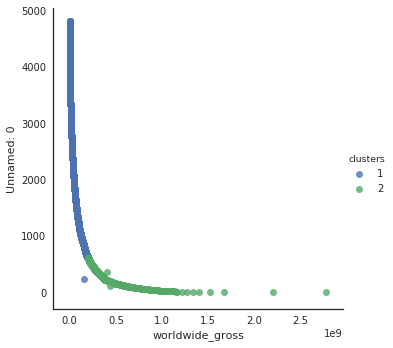

In [2]:
def label_gross_2 (gross):
    if (gross < 200000000) : return 1
    elif (gross >= 200000000) : return 2

def label_gross_3 (gross):
    if (gross < 10000000) : return 1
    elif ((gross >= 10000000) & (gross < 300000000)) : return 2
    elif (gross >= 300000000) : return 3

def label_gross_4 (gross):
    if (gross < 5000000) : return 1
    elif ((gross >= 5000000) & (gross < 50000000)) : return 2
    elif ((gross >= 50000000) & (gross < 350000000)) : return 3
    elif (gross >= 350000000) : return 4

def label_gross_5 (gross):
    if (gross < 1000000) : return 1
    elif ((gross >= 1000000) & (gross < 25000000)) : return 2
    elif ((gross >= 25000000) & (gross < 100000000)) : return 3
    elif ((gross >= 100000000) & (gross < 400000000)) : return 4
    elif (gross >= 400000000) : return 5


%matplotlib inline
file_plot = "../dataset/movie_metadata_cleaned_no_vector_num_only.csv"
sns.set(style="white", color_codes=True)
df = pd.read_csv(file_plot)
df = df.dropna()
#from sklearn.cluster import AffinityPropagation
#af = AffinityPropagation().fit(df.drop('worldwide_gross', axis=1))
df["clusters"] = df.worldwide_gross.apply (lambda gross: label_gross_2 (gross))
#x_plot = preprocessing.Normalizer().fit_transform(df["worldwide_gross"])
#df["worldwide_gross"] = x_plot.reshape((-1, 1))
#df.sort(['worldwide_gross'], ascending=[True, False], inplace=True)
sns.lmplot(x="worldwide_gross", y="Unnamed: 0", data=df, hue="clusters", fit_reg=False)
#sns.pairplot(df, hue="clusters")
#pd.DataFrame()



In [46]:
from sklearn.feature_selection import GenericUnivariateSelect, RFE

#len(X.columns)
##by default polynomical tranform adds new features n_features^pol + comb(pol,n_feeatures^pol-1)
#pol = PolynomialFeatures(degree = 3, include_bias = False, interaction_only=True).fit(X)
#print(pol.n_input_features_)
#print(pol.n_output_features_)

n_samples, n_features = X.shape
def get_powers_list(n_samples, n_features, n):
    base_arr = [{"pw":2},{"pw":3},{"pw":4}]
    max_pw = math.ceil(n_samples/n_features)
    step = math.floor((max_pw-4) / n)
    extra_arr = [{"pw":power} for power in range(4 + step, max_pw, step)]
    if  n_samples/n_features < 2:
        res = [{"pw":1}]
    elif max_pw - 1 == 2:
        res = [{"pw":2}]
    elif max_pw - 1 == 3:
        res = [{"pw":2}, {"pw":3}]
    elif max_pw - 1 == 4:
        res = [{"pw":2},{"pw":3},{"pw":4}]
    else :
        res = base_arr + extra_arr
    return res

def get_components_list(n_features, lst):
    lst = lst + [{"pw": 0.1},{"pw": 0.4},{"pw": 0.5},{"pw": 0.8}]
    lst = sorted(list(map(lambda x: math.floor(x["pw"]*n_features), lst)) + [1, 3, 5], reverse=True)
    lst[0] = lst[0]-1
    lst_n = [n for n in lst if n < 3321]
    if len(lst_n) < len(lst):
        lst_n = [3320] + lst_n 
    return lst_n


#get_components_list(n_features,get_components_list(n_features, [{"pw":2}, {"pw":1}])t_powers_list(n_samples, n_features, 3))

get_components_list(n_features,get_powers_list(n_samples, n_features, 3))

tuples_of_data = [(y,X), (y,X)]

for ind, tupl in enumerate(tuples_of_data):
    y_crr,x_crr = tupl
    print(ind)

0
1


In [33]:
np.reciprocal(np.logspace(-4, 4, 3))

array([  1.00000000e+04,   1.00000000e+00,   1.00000000e-04])

In [47]:
def label_gross_5 (gross):
    if (gross < 1000000) : return 1
    elif ((gross >= 1000000) & (gross < 25000000)) : return 2
    elif ((gross >= 25000000) & (gross < 100000000)) : return 3
    elif ((gross >= 100000000) & (gross < 400000000)) : return 4
    elif (gross >= 400000000) : return 5
    
label_gross_5.__name__

'label_gross_5'